In [1]:
import winsound as sd
import serial
import csv
import time
from datetime import datetime
import numpy as np
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
%matplotlib notebook

In [2]:
seri = serial.Serial(port='COM4', baudrate=9600)
seri2 = serial.Serial(port='COM3', baudrate=9600) 

In [3]:
def getDataFunc1(i):
    try:
        if seri.readable():
            ret = seri.readline()
            ret = ret.decode()
            ret = ret.split("-")
            PM10= ret[0]
            PM25= ret[1]
            return int(PM10), int(PM25)
    except Exception as ex:
        return 0
        pass

In [4]:
def getDataFunc2(i):
    try:
        if seri2.readable():
            ret = seri2.readline()
            ret = ret.decode()
            ret = ret.split("-")
            PM10= ret[0]
            PM25= ret[1]
            return int(PM10), int(PM25)
    except Exception as ex:
        return 0
        pass

In [5]:
fname=time.strftime("%Y%m%d%H%M%S")
initialtime=time.time()

<IPython.core.display.Javascript object>


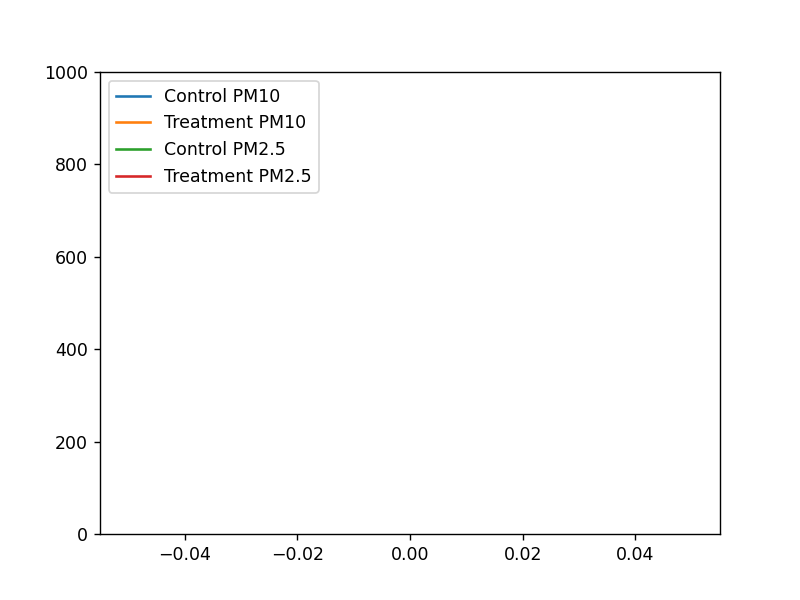

C:\Users\nofev\AppData\Local\Temp\ipykernel_5772\609152575.py:51: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(plt.gcf(), animate, interval = 100)


In [6]:
root=tk.Tk() #window 생성
root.title('미세먼지 농도 측정')
root.geometry("1000x800+100+100") #창 크기 +붙은 부분은 좌상단 떨어진 위치
root.resizable(True,True) #창 크기 조절 가능 여부 (디폴트 True)
x_val=[]
y_val_10=[]
y_val_25=[]
z_val_10=[]
z_val_25=[]
f=open(fname+'.csv', 'w', newline='')
f.close()
def animate(i):
    nowtime=time.time()
    nowtimestr=time.strftime("%H:%M:%S")
    time_interval=nowtime-initialtime
    time_interval_str=int(time_interval)
    PM10=getDataFunc1(0)[0]
    PM25=getDataFunc1(0)[1]
    PM10_2=getDataFunc2(0)[0]
    PM25_2=getDataFunc2(0)[1]
    if PM10_2 < 150:
        sd.Beep(2000, 500)
    x_val.append(time_interval_str)
    y_val_10.append(PM10)
    y_val_25.append(PM25)
    z_val_10.append(PM10_2)
    z_val_25.append(PM25_2)
    lab02=tk.Label(root,text=nowtimestr,font=('Arial 20 bold'),bg="white",fg="black",width=15)
    lab02.grid(row=0,column=1,padx=10,pady=20) 
    lab03=tk.Label(root,text=time_interval_str,font=('Arial 20 bold'),bg="white",fg="black",width=5)
    lab03.grid(row=0,column=2,padx=10,pady=20) 
    lab01=tk.Label(root,text=PM10,font=('Arial 20 bold'),bg="white",fg="black",width=5)
    lab01.grid(row=0,column=3,padx=10,pady=20)
    lab04=tk.Label(root,text=PM10_2,font=('Arial 20 bold'),bg="white",fg="black",width=5)
    lab04.grid(row=0,column=4,padx=10,pady=20)
    plt.cla()
    plt.plot(x_val[-30:], y_val_10[-30:],label='Control PM10')
    plt.plot(x_val[-30:], z_val_10[-30:],label='Treatment PM10')
    plt.plot(x_val[-30:], y_val_25[-30:],label='Control PM2.5')
    plt.plot(x_val[-30:], z_val_25[-30:],label='Treatment PM2.5')
    plt.legend(loc='upper left')
    plt.ylim([0, 1000])
    canvas = FigureCanvasTkAgg(plt.gcf(), master=root)
    canvas.get_tk_widget().place(x=20, y=100)
    f=open(fname+'.csv', 'a', newline='')
    wr=csv.writer(f)
    wr.writerow([nowtimestr, x_val[-1], y_val_10[-1], y_val_25[-1], z_val_10[-1], z_val_25[-1]])
    root.update()


ani = FuncAnimation(plt.gcf(), animate, interval = 100)

plt.tight_layout()
plt.show()

In [7]:

#while(True):
    #nowtime=time.time()
    #nowtimestr=time.strftime("%M:%S")
    #time_interval=nowtime-initialtime
    #time_interval_str=int(time_interval)
    #PM10=getDataFunc1(0)
    #lab02=tk.Label(root,text=nowtimestr,font=('Arial 20 bold'),bg="white",fg="black",width=15)
    #lab02.grid(row=0,column=1,padx=10,pady=20) 
    #lab03=tk.Label(root,text=time_interval_str,font=('Arial 20 bold'),bg="white",fg="black",width=5)
    #lab03.grid(row=0,column=2,padx=10,pady=20) 
    #lab01=tk.Label(root,text=PM10,font=('Arial 20 bold'),bg="white",fg="black",width=5)
    #lab01.grid(row=0,column=3,padx=10,pady=20)



    #이렇게 .grid 따로 입력 해야 .destroy() 명령어 적용가능
    #lab01.destroy()
    #lab02.destroy()
    #lab03.destroy()
    #plt.tight_layout()   
    #plt.show()
    #time.sleep(1)


In [8]:
getDataFunc2(0)[1]

40